In [1]:
import splitfolders
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPooling2D,Flatten,Activation
from tensorflow.keras import regularizers

In [2]:
#input_folder = 'image_data/'
#splitfolders.ratio(input_folder,output="image_dataset",seed=42,ratio=(.7, .2, .1),group_prefix=None)

In [3]:
img=cv2.imread("image_dataset/train/colon_aca/colonca1.jpeg")
img.shape

(768, 768, 3)

In [4]:
train_directory = 'image_dataset/train'
test_directory = 'image_dataset/test'
val_directory = 'image_dataset/val'

In [5]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_directory,
    target_size=(200,200),
    color_mode='rgb',
    batch_size=200,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)
validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_directory,
    target_size=(200,200),
    color_mode='rgb',
    batch_size=200,
    class_mode='categorical',
    shuffle=True,
    seed=42
   
    
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
test_directory,
target_size=(200,200), 
color_mode='rgb', 
batch_size=200, 
class_mode='categorical',    
shuffle=False
)

Found 7000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4,4), activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(64, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(128, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(4,4))


model.add(Flatten())
model.add(Dense(32, kernel_regularizer=regularizers.l2(l2=0.001)))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001),loss='categorical_crossentropy',metrics=['accuracy'])
rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)
history = model.fit(train_generator,
                    steps_per_epoch=10,
                    epochs=30,
                    callbacks=[rlrop],          
                    validation_data=validation_generator,
                    validation_steps=5)          

Epoch 1/30
10/10 [==============================] - 84s 8s/step - loss: 0.7838 - accuracy: 0.5125 - val_loss: 0.7499 - val_accuracy: 0.4930 - lr: 0.0010
Epoch 2/30
10/10 [==============================] - 88s 9s/step - loss: 0.7420 - accuracy: 0.5135 - val_loss: 0.7364 - val_accuracy: 0.5120 - lr: 0.0010
Epoch 3/30
10/10 [==============================] - 87s 9s/step - loss: 0.7333 - accuracy: 0.5550 - val_loss: 0.7273 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 4/30
10/10 [==============================] - 79s 8s/step - loss: 0.7202 - accuracy: 0.5845 - val_loss: 0.7014 - val_accuracy: 0.7550 - lr: 0.0010
Epoch 5/30
10/10 [==============================] - 75s 7s/step - loss: 0.7151 - accuracy: 0.5685 - val_loss: 0.6879 - val_accuracy: 0.7230 - lr: 0.0010
Epoch 6/30
10/10 [==============================] - 72s 7s/step - loss: 0.6830 - accuracy: 0.6725 - val_loss: 0.6765 - val_accuracy: 0.6100 - lr: 0.0010
Epoch 7/30
10/10 [==============================] - 72s 7s/step - loss: 0.6476 - a

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

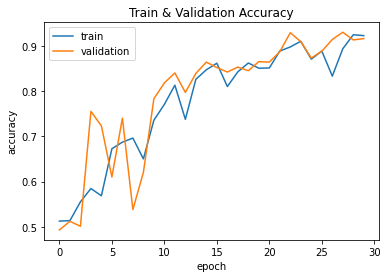

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train & Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

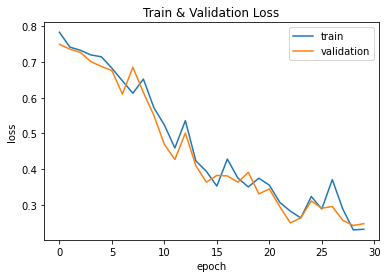

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train & Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [10]:
model.evaluate(test_generator)

5/5 [==============================] - 14s 3s/step - loss: 0.2307 - accuracy: 0.9200


[0.23068243265151978, 0.9200000166893005]

              precision    recall  f1-score   support

   colon_aca       0.91      0.94      0.92       500
     colon_n       0.93      0.90      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



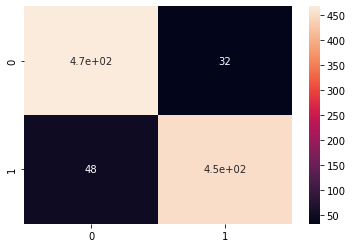

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

pred = model.predict(test_generator)
pred_classes = [np.argmax(element) for element in pred]
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

sns.heatmap(confusion_matrix(true_classes,pred_classes), annot = True)



report = classification_report(true_classes, pred_classes, target_names = class_labels)
print(report)